In [60]:
# importing libraries
import pandas as pd
import numpy as np
from ipywidgets import widgets
import difflib
import matplotlib.pyplot as plt

In [10]:
first_name = input("Please insert the first name of the player you want to see trends for")
last_name = input("Please insert the last name of the player you want to see trends for")
full_name = first_name + " " + last_name

In [11]:
# reading clean file
file_path = "C:/Github Repo/NBA-Analytics/data/basketballProject/cleaned-files/cleaned-data.csv"
clean_df = pd.read_csv(file_path)

In [41]:
# creating df for fuzzy match between user input and existing data
fuzzy_df = pd.DataFrame([full_name],columns=["PLAYER"])

# creating duplicate column of fuzzy name across which match will be made
fuzzy_df["fuzzy_name"] = fuzzy_df["PLAYER"]

# matching and overwriting fuzzy input with best match from existing data
fuzzy_df["PLAYER"] = fuzzy_df["PLAYER"].apply(lambda x: difflib.get_close_matches(x, clean_df["PLAYER"])[0])

# storing name of best match in a variable
predicate_name = fuzzy_df["PLAYER"][fuzzy_df["fuzzy_name"] == full_name][0]

# get subset of player statistics relevant to the name passed in the predicate
relevant_df = clean_df[clean_df["PLAYER"] == predicate_name].reset_index()

In [44]:
for index, row in relevant_df.iterrows():
    season_orig = row["SEASON_ID"]
    season = "'"+row["SEASON_ID"][-2:]
    relevant_df.loc[relevant_df["SEASON_ID"] == season_orig, "SEASON_ID"] = season

In [58]:
columns_list = relevant_df.columns.tolist()[3:]

In [78]:
default_x_axis = "Age"
default_y_axis = "PTS"

x_axis_dd = widgets.Dropdown(options = columns_list
                ,value = 'SEASON_ID'
                ,description = 'x-axis:'
                )

y_axis_dd = widgets.Dropdown(options = columns_list
                ,value = 'PTS'
                ,description = 'y-axis:'
                )

def dropdownn_handler_x(change):
    global default_x_axis
    default_x_axis = change.new

def dropdownn_handler_y(change):
    global default_y_axis
    default_y_axis = change.new

x_axis_dd.observe(dropdownn_handler_x, names='value')
y_axis_dd.observe(dropdownn_handler_y, names='value')
display(x_axis_dd)
display(y_axis_dd)

Dropdown(description='x-axis:', index=3, options=('Season #', 'PLAYER_ID', 'PLAYER', 'SEASON_ID', 'TEAM_ID', '…

Dropdown(description='y-axis:', index=26, options=('Season #', 'PLAYER_ID', 'PLAYER', 'SEASON_ID', 'TEAM_ID', …

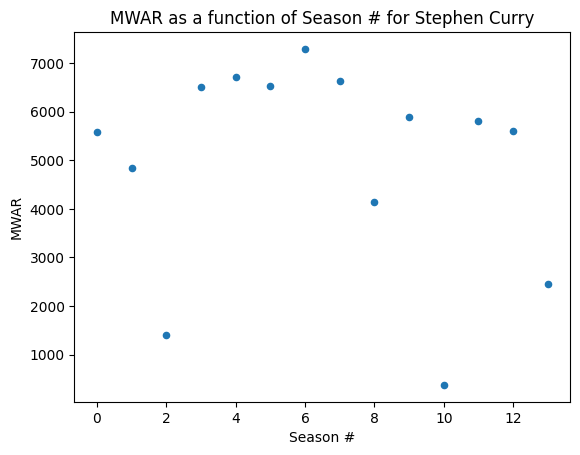

In [88]:
chart_title = default_y_axis + " as a function of "+ default_x_axis + " for " + predicate_name
relevant_df.plot(x=default_x_axis, y =default_y_axis, kind="scatter",title=chart_title)
plt.show()

P.S.: if this isn't the player you are interested in, please try the input again